In [27]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from pycwt import cwt,xwt,wct,wct_significance,wavelet,Morlet
import matplotlib.dates as mdates
import pandas as pd
import os

from scipy.signal import detrend
path = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/ss/"
files = sorted([f for f in os.listdir(path) if f.endswith(".nc")])

In [28]:
files

['1okha_graftfill.nc',
 '2mumbai_graftfill.nc',
 '3jaigarh_graftfill.nc',
 '4goa_graftfill.nc',
 '5udupi_graftfill.nc',
 '6kollam_graftfill.nc',
 '7kanyakumari_graftfill.nc']

In [29]:
patho = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/wavelet/ss_wavelet/"

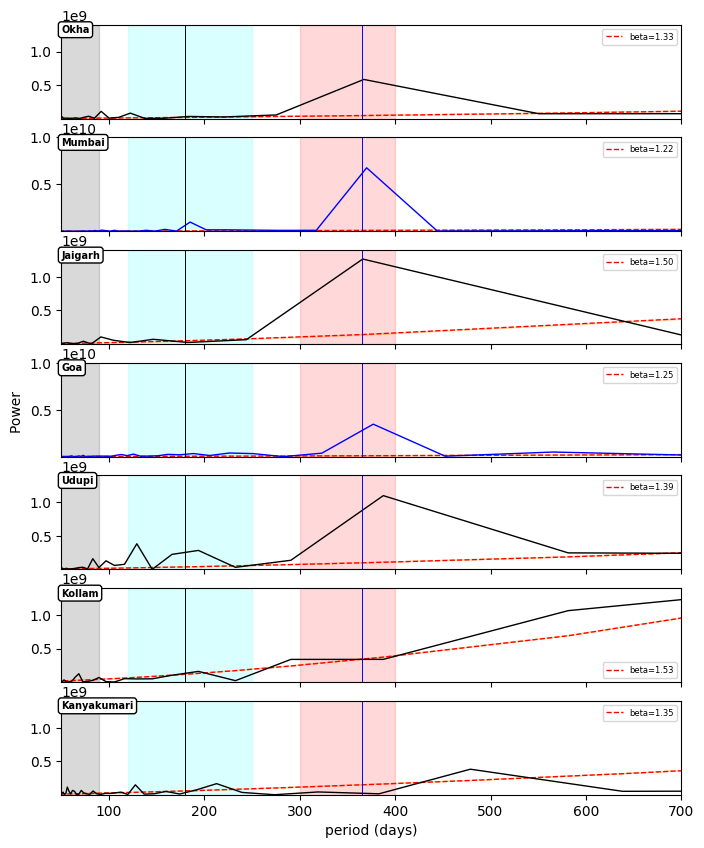

In [300]:
start=[18963,0 , 0   , 0, 0    , 0    , 0]
end = [45401,-1,17570,-1, 27907, 27909, -1]
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]

fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(8,10),sharex=True)

for i in range(7):
    ds = xr.open_dataset(path+files[i])
    ss= np.array(ds.SS[start[i]:end[i],0,0].values)
    signal = ss
    fft_result = np.fft.fft(signal)
    power_spectrum = np.abs(fft_result) ** 2
    freqs = np.fft.fftfreq(len(signal), 1)

    p0 = (np.max(power_spectrum), 1.0)  # Initial guess for parameters A and beta
    bounds = ([0, 0], [np.inf, np.inf])  # Lower bounds for A and beta
    popt, pcov = curve_fit(red_noise_model, np.abs(freqs[:N//2]), power_spectrum[:N//2], p0=p0, bounds=bounds)
    A_fit, beta_fit = popt
    std_err_A, std_err_beta = np.sqrt(np.diag(pcov))
    conf_int_A = std_err_A * 2.576
    conf_int_beta = std_err_beta * 2.576
    upper_bound = red_noise_model(np.abs(freqs[:N//2]), A_fit + conf_int_A, beta_fit)
    lower_bound = red_noise_model(np.abs(freqs[:N//2]), A_fit - conf_int_A, beta_fit)

    if i == 1 or i == 3:
        ax[i].set_ylim(ymin=50,ymax=10**10)
        ax[i].text(50,10**10,names[i], fontsize=7, va='top',
            ha='left',color='black',fontweight="bold",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=1))
        ax[i].plot(1/freqs[:N//2][1:]/24, red_noise_model(np.abs(freqs[:N//2][1:]), *popt), label=f'beta={beta_fit:.2f}', linestyle='--',color='r',linewidth=1)
        ax[i].plot(1/freqs[:N//2][1:]/24, power_spectrum[:N//2][1:],color='b',linewidth=1)
        ax[i].fill_between(1/freqs[:N//2][1:]/24, lower_bound[1:], upper_bound[1:], color='orange', alpha=0.3)
        ax[i].set_xlim(xmin=50,xmax=700)
        ax[i].ticklabel_format(useOffset=False)
        ax[i].legend(fontsize=6)
    else:
        ax[i].set_ylim(ymin=50,ymax=0.14*10**10)
        ax[i].text(50,0.14*10**10,names[i], fontsize=7, va='top',
            ha='left',color='black',fontweight="bold",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=1))
        ax[i].plot(1/freqs[:N//2][1:]/24, red_noise_model(np.abs(freqs[:N//2][1:]), *popt), label=f'beta={beta_fit:.2f}', linestyle='--',color='r',linewidth=1)
        ax[i].plot(1/freqs[:N//2][1:]/24, power_spectrum[:N//2][1:],color='k',linewidth=1)
        ax[i].fill_between(1/freqs[:N//2][1:]/24, lower_bound[1:], upper_bound[1:], color='orange', alpha=0.3)
        ax[i].set_xlim(xmin=50,xmax=700)
        ax[i].ticklabel_format(useOffset=False)
        ax[i].legend(fontsize=6)    
    ax[i].axvspan(300,400, alpha=0.15, color='red')
    ax[i].axvspan(120,250, alpha=0.15, color='cyan')
    ax[i].axvspan(30,90, alpha=0.15, color='black')
    ax[i].axvline(365,color='b',linestyle='-',linewidth=0.7)
    ax[i].axvline(180,color='k',linestyle="-",linewidth=0.7)

#plt.gcf().axes[i].yaxis.get_major_formatter().set_scientific(False)
#ax[i].set_yticks()
#ax[i].set_yticklabels(['J','F','M','A','M','J','J','A','S','O','N','D','J'])

ax[3].set_ylabel('Power ')
ax[-1].set_xlabel('period (days)')
#fig.tight_layout()

plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/west_coast_fft_ss.png",dpi=250)

In [30]:
s0 = 24
dt = 1
dj = 0.125
#J = int(np.log2(24*365*3 / s0) / dj)
mother = wavelet.Morlet(6.)

In [11]:
s0 = 24
dt = 1
dj = 0.125
J = int(np.log2(24*365*3 / s0) / dj)
mother = wavelet.Morlet(6.)

# OKHA 

In [216]:
ds = xr.open_dataset(path+files[0])
ss= np.array(ds.SS.values)

In [217]:
ss_1 = detrend(ss[0:10099,0,0])
wave1, scales1, freqs1, coi1, fft1, fftfreqs1 = cwt(ss_1,dt=1,dj=dj,s0=s0, J=-1, wavelet=mother)
power1 = (np.abs(wave1)) ** 2  # Wavelet power spectrum
period1 = 1 / freqs1  # Convert frequencies to periods
N = len(ss_1)
alpha, _, _ = wavelet.ar1(ss_1)  # Lag-1 autocorrelation for red noise
std = ss_1.std()  # Standard deviation
var = std ** 2  # Variance
signif, fft_theor = wavelet.significance(ss_1, dt, scales1, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig951 = np.ones([1, N]) * signif[:, None]
sig951 = power1 / sig951


In [218]:
ss_2 = detrend(ss[18963:45401,0,0])
wave2, scales2, freqs2, coi2, fft2, fftfreqs2 = cwt(ss_2,dt=1,dj=dj,s0=s0, J=-1, wavelet=mother)
power2 = (np.abs(wave2)) ** 2  # Wavelet power spectrum
period2 = 1 / freqs2  # Convert frequencies to periods

N = len(ss_2)
alpha, _, _ = wavelet.ar1(ss_2)  # Lag-1 autocorrelation for red noise
std = ss_2.std()  # Standard deviation
var = std ** 2  # Variance
signif, fft_theor = wavelet.significance(ss_2, dt, scales2, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig952 = np.ones([1, N]) * signif[:, None]
sig952 = power2 / sig952

In [ ]:
signal = ss_2
fft_result = np.fft.fft(signal)
power_spectrum = np.abs(fft_result) ** 2
freqs = np.fft.fftfreq(len(signal), 1)

p0 = (np.max(power_spectrum), 1.0)  # Initial guess for parameters A and beta
bounds = ([0, 0], [np.inf, np.inf])  # Lower bounds for A and beta
popt, pcov = curve_fit(red_noise_model, np.abs(freqs[:N//2]), power_spectrum[:N//2], p0=p0, bounds=bounds)
A_fit, beta_fit = popt
std_err_A, std_err_beta = np.sqrt(np.diag(pcov))
conf_int_A = std_err_A * 2.576
conf_int_beta = std_err_beta * 2.576
upper_bound = red_noise_model(np.abs(freqs[:N//2]), A_fit + conf_int_A, beta_fit)
lower_bound = red_noise_model(np.abs(freqs[:N//2]), A_fit - conf_int_A, beta_fit)
plt.fill_between(1/freqs[:N//2][1:]/24, lower_bound[1:], upper_bound[1:], color='orange', alpha=0.3, label='99% Confidence Interval')

#plt.plot(1/freqs[1:], np.abs(fft_result[1:]),color='k')
plt.plot(1/freqs[:N//2][1:]/24, red_noise_model(np.abs(freqs[:N//2][1:]), *popt), label=f'Red Noise Fit (beta={beta_fit:.2f})', linestyle='--',color='k')

#plt.plot(1/freqs[1:], np.abs(fft_vals[1:]),color='r')
plt.plot(1/freqs[:N//2][1:]/24, power_spectrum[:N//2][1:],color='r')
#plt.plot(power_r,color='b')

plt.title('FFT of Signal')
plt.xlabel('period (days)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(1,600)
plt.ylim(0,6*10**8)

Text(0, 0.5, 'period (days)')

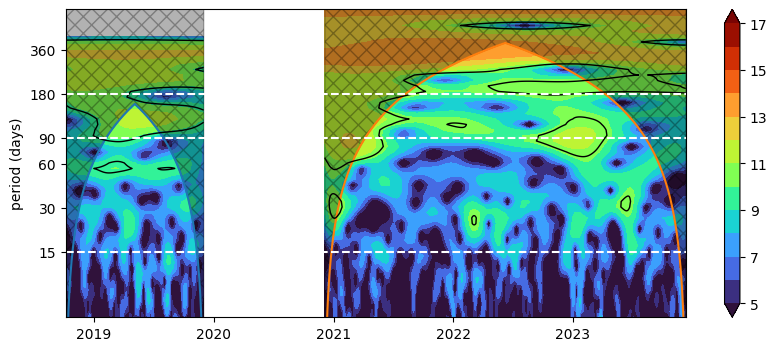

In [101]:
plt.figure(figsize=(10,4))

x = plt.contourf(ds.TIME1[0:10099], np.log2(period1), np.log2(power1), extend='both',cmap="turbo",levels=np.arange(5,18,1))
plt.plot(ds.TIME1[0:10099], np.log2(coi1))
plt.fill_between(ds.TIME1[0:10099],np.log2(coi1),16,color='k',alpha=0.3,hatch='xx')
extent = [ds.TIME1[0:10099].min(), ds.TIME1[0:10099].max(), 0, max(period1)]
plt.contour(ds.TIME1[0:10099], np.log2(period1), sig951,levels=[-99,1], colors='k', linewidths=1,extent=extent)

plt.contourf(ds.TIME1[18963:45401], np.log2(period2), np.log2(power2), extend='both',cmap="turbo",levels=np.arange(5,18,1))
plt.plot(ds.TIME1[18963:45401], np.log2(coi2))
plt.fill_between(ds.TIME1[18963:45401],np.log2(coi2),16,color='k',alpha=0.3,hatch='xx')
extent = [ds.TIME1[18963:45401].min(), ds.TIME1[18963:45401].max(), 0, max(period2)]
plt.contour(ds.TIME1[18963:45401], np.log2(period2), sig952,levels=[-99,1], colors='k', linewidths=1,extent=extent)


plt.axhline(np.log2(24),color='w',linestyle='--')
plt.axhline(np.log2(24*15),color='w',linestyle='--')
plt.axhline(np.log2(24*90),color='w',linestyle='--')
plt.axhline(np.log2(24*180),color='w',linestyle='--')


plt.colorbar(x)

plt.ylim(7,14)
customticks = [15*24,30*24,60*24,90*24,180*24,360*24]
customticks = [np.log2(e) for e in customticks]
customlabel = ["15","30","60","90","180","360"]
plt.yticks(customticks)
plt.gca().set_yticklabels(customlabel)
plt.ylabel("period (days)")

In [103]:
wavpow1 = xr.DataArray(
    data=power1,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1[0:10099].values})
wavpow2=xr.DataArray(
    data=power2,
    dims=["period","time"],
    coords={"period":period2,'time':ds.TIME1[18963:45401].values})

ci1 = xr.DataArray(
    data=coi1,
    dims=["time"],
    coords={'time':ds.TIME1[0:10099].values})
ci2=xr.DataArray(
    data=coi2,
    dims=["time"],
    coords={'time':ds.TIME1[18963:45401].values}
)

sig1 = xr.DataArray(
    data=sig951,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1[0:10099].values})
sig2=xr.DataArray(
    data=sig952,
    dims=["period","time"],
    coords={"period":period2,'time':ds.TIME1[18963:45401].values})
ds = xr.Dataset({
    'wavpow1': wavpow1,
    'wavpow2': wavpow2,
    'sig1': sig1,
    'sig2': sig2,
    'coi1': ci1,
    'coi2': ci2,
})
ds.to_netcdf(patho+str(files[0]))

# for daily resampled data

In [ ]:
ds = xr.open_dataset(path+files[0])
ds40 = ds.sel(DEPTH=40,method="nearest").resample(TIME1='24h').mean()
bm40d = np.array(ds40.BIOMASS[:,0,0].values)

s0 = 2
dj = 0.01
#J = int(np.log2(24*365*3 / s0) / dj)
mother = wavelet.Morlet(6.)
bm40d_1 = detrend(bm40d[0:422])
wave1, scales1, freqs1, coi1, fft1, fftfreqs1 = cwt(bm40d_1,dt=1,dj=dj,s0=s0, J=-1, wavelet=mother)
power1 = (np.abs(wave1)) ** 2  # Wavelet power spectrum
period1 = 1 / freqs1  # Convert frequencies to periods

plt.contourf(ds40.TIME1[0:422], np.log2(period1), np.log2(power1), extend='both',cmap="turbo",levels=np.arange(10,15,0.1))
#plt.contourf(wave1,cmap="turbo",levels=(np.arange(20,60,10)),extend="both")
plt.plot(ds40.TIME1[0:422], np.log2(coi1))
plt.fill_between(ds40.TIME1[0:422],np.log2(coi1),10,color='k',alpha=0.3,hatch='xx')
plt.colorbar()

# mumbai

In [168]:
ds = xr.open_dataset(path+files[1])
ss= np.array(ds.SS[:,0,0].values)
ss_1 = detrend(ss)

wave1, scales1, freqs1, coi1, fft1, fftfreqs1 = cwt(ss_1,dt=1,dj=dj,s0=s0, J=-1, wavelet=mother)
power1 = (np.abs(wave1)) ** 2  # Wavelet power spectrum
period1 = 1 / freqs1  # Convert frequencies to periods

Text(0, 0.5, 'period (days)')

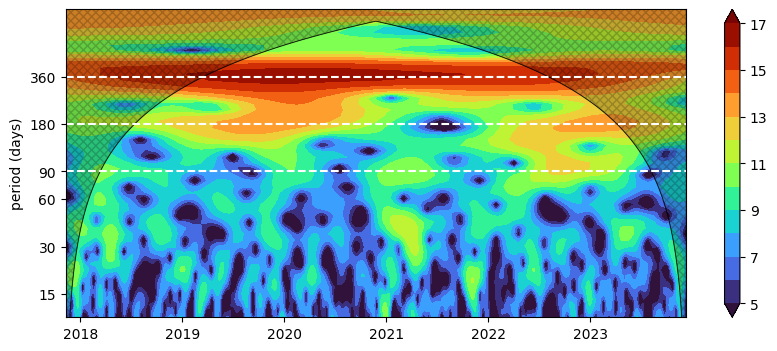

In [169]:
plt.figure(figsize=(10,4))

plt.contourf(ds.TIME1, np.log2(period1), np.log2(power1), extend='both',cmap="turbo",levels=np.arange(5,18,1))
plt.plot(ds.TIME1, np.log2(coi1),color='k',linewidth=0.5)
plt.fill_between(ds.TIME1,np.log2(coi1),16,color='k',alpha=0.2,hatch='xxxx')

plt.axhline(np.log2(24*90),color='w',linestyle='--')
plt.axhline(np.log2(24*180),color='w',linestyle='--')
plt.axhline(np.log2(24*360),color='w',linestyle='--')

plt.colorbar()
plt.ylim(8,14.5)

customticks = [15*24,30*24,60*24,90*24,180*24,360*24]
customticks = [np.log2(e) for e in customticks]
customlabel = ["15","30","60","90","180","360"]
plt.yticks(customticks)
plt.gca().set_yticklabels(customlabel)
plt.ylabel("period (days)")

In [111]:
period1 = 1 / freqs1  # Convert frequencies to periods
N = len(ss_1)
alpha, _, _ = wavelet.ar1(ss_1)  # Lag-1 autocorrelation for red noise
std = ss_1.std()  # Standard deviation
var = std ** 2  # Variance
signif, fft_theor = wavelet.significance(ss_1, dt, scales1, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)

sig951 = np.ones([1, N]) * signif[:, None]
sig951 = power1 / sig951
wavpow1 = xr.DataArray(
    data=power1,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1.values})
ci1 = xr.DataArray(
    data=coi1,
    dims=["time"],
    coords={'time':ds.TIME1.values})
sig1 = xr.DataArray(
    data=sig951,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1.values})

ds = xr.Dataset({
    'wavpow1': wavpow1,
    'sig1': sig1,
    'coi1': ci1,
})

In [112]:
ds.to_netcdf(patho+str(files[1]))

(1.0, 600.0)

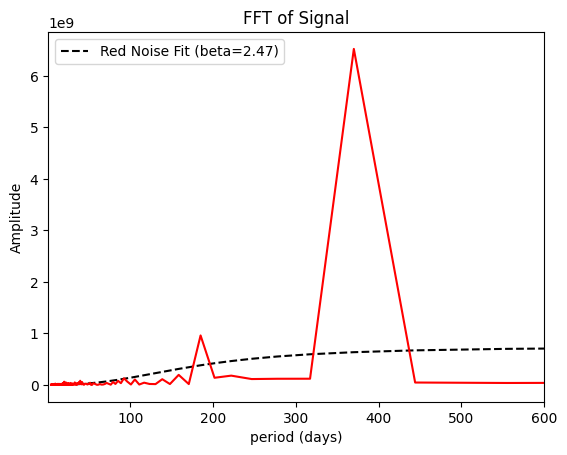

In [170]:
signal = ss_1
fft_result = np.fft.fft(signal)
power_spectrum = np.abs(fft_result) ** 2
freqs = np.fft.fftfreq(len(signal), 1)

p0 = (np.max(power_spectrum), 1.0)  # Initial guess for parameters A and beta
bounds = ([0, 0], [np.inf, np.inf])  # Lower bounds for A and beta
popt, pcov = curve_fit(red_noise_model, np.abs(freqs[:N//2]), power_spectrum[:N//2], p0=p0, bounds=bounds)
A_fit, beta_fit = popt

#plt.plot(1/freqs[1:], np.abs(fft_result[1:]),color='k')
plt.plot(1/freqs[:N//2][1:]/24, red_noise_model(np.abs(freqs[:N//2][1:]), *popt), label=f'Red Noise Fit (beta={beta_fit:.2f})', linestyle='--',color='k')

#plt.plot(1/freqs[1:], np.abs(fft_vals[1:]),color='r')
plt.plot(1/freqs[:N//2][1:]/24, power_spectrum[:N//2][1:],color='r')
#plt.plot(power_r,color='b')

plt.title('FFT of Signal')
plt.xlabel('period (days)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(1,600)
#plt.ylim(0,2*10**8)

# Jaigarh

##### different than jaigarh 40 m. in timeseries.

In [171]:
ds = xr.open_dataset(path+files[2])
ss= np.array(ds.SS[:,0,0].values)

In [172]:

ss_1 = detrend(ss[0:17570])
ss_2 = detrend(ss[27122:38136])


In [22]:
ss_1 = detrend(ss[0:17570])
wave1, scales1, freqs1, coi1, fft1, fftfreqs1 = cwt(ss_1,dt=1,dj=dj,s0=s0, J=-1, wavelet=mother)
power1 = (np.abs(wave1)) ** 2  # Wavelet power spectrum
period1 = 1 / freqs1  # Convert frequencies to periods
N = len(ss_1)
alpha, _, _ = wavelet.ar1(ss_1)  # Lag-1 autocorrelation for red noise
std = ss_1.std()  # Standard deviation
var = std ** 2  # Variance
signif, fft_theor = wavelet.significance(ss_1, dt, scales1, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig951 = np.ones([1, N]) * signif[:, None]
sig951 = power1 / sig951


ss_2 = detrend(ss[27122:38137])
wave2, scales2, freqs2, coi2, fft2, fftfreqs2 = cwt(ss_2,dt=1,dj=dj,s0=s0, J=-1, wavelet=mother)
power2 = (np.abs(wave2)) ** 2  # Wavelet power spectrum
period2 = 1 / freqs2  # Convert frequencies to periods

N = len(ss_2)
alpha, _, _ = wavelet.ar1(ss_2)  # Lag-1 autocorrelation for red noise
std = ss_2.std()  # Standard deviation
var = std ** 2  # Variance
signif, fft_theor = wavelet.significance(ss_2, dt, scales2, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig952 = np.ones([1, N]) * signif[:, None]
sig952 = power2 / sig952

Text(0, 0.5, 'period (days)')

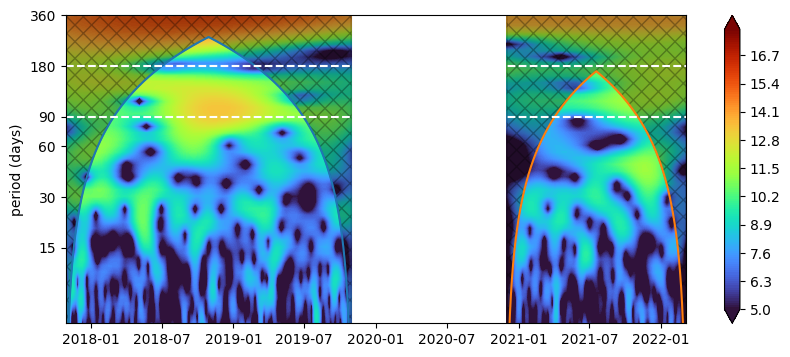

In [23]:
plt.figure(figsize=(10,4))
plt.contourf(ds.TIME1[0:17570], np.log2(period1), np.log2(power1), extend='both',cmap="turbo",levels=np.arange(5,18,0.1))
plt.plot(ds.TIME1[0:17570], np.log2(coi1))
plt.fill_between(ds.TIME1[0:17570],np.log2(coi1),16,color='k',alpha=0.3,hatch='xx')

plt.contourf(ds.TIME1[27122:38137], np.log2(period2), np.log2(power2), extend='both',cmap="turbo",levels=np.arange(5,18,0.1))
plt.plot(ds.TIME1[27122:38137], np.log2(coi2))
plt.fill_between(ds.TIME1[27122:38137],np.log2(coi2),16,color='k',alpha=0.3,hatch='xx')


plt.axhline(np.log2(24*90),color='w',linestyle='--')
plt.axhline(np.log2(24*180),color='w',linestyle='--')
plt.axhline(np.log2(24*360),color='w',linestyle='--')


plt.colorbar()
plt.ylim(7,12.5)

customticks = [15*24,30*24,60*24,90*24,180*24,360*24]
customticks = [np.log2(e) for e in customticks]
customlabel = ["15","30","60","90","180","360"]
plt.yticks(customticks)
plt.gca().set_yticklabels(customlabel)
plt.ylabel("period (days)")

In [24]:
wavpow1 = xr.DataArray(
    data=power1,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1[0:17570].values})
wavpow2=xr.DataArray(
    data=power2,
    dims=["period","time"],
    coords={"period":period2,'time':ds.TIME1[27122:38137].values})


ci1 = xr.DataArray(
    data=coi1,
    dims=["time"],
    coords={'time':ds.TIME1[0:17570].values})
ci2=xr.DataArray(
    data=coi2,
    dims=["time"],
    coords={'time':ds.TIME1[27122:38137].values})

sig1 = xr.DataArray(
    data=sig951,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1[0:17570].values})
sig2=xr.DataArray(
    data=sig952,
    dims=["period","time"],
    coords={"period":period2,'time':ds.TIME1[27122:38137].values})


ds = xr.Dataset({
    'wavpow1': wavpow1,
    'wavpow2': wavpow2,
    'sig1': sig1,
    'sig2': sig2,
    'coi1': ci1,
    'coi2': ci2,
})

In [26]:
ds.to_netcdf(patho+str(files[2]))

(1.0, 600.0)

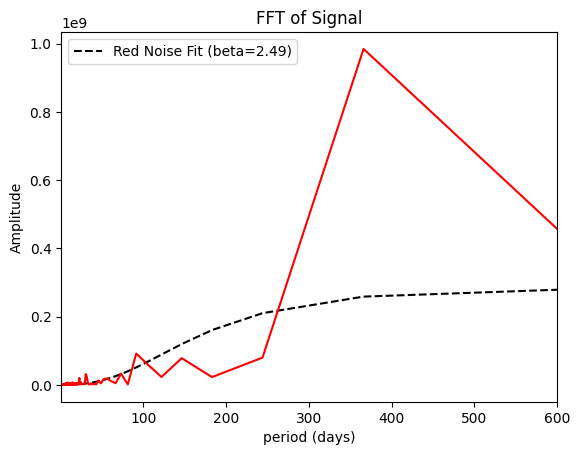

In [173]:
signal = ss_1
fft_result = np.fft.fft(signal)
power_spectrum = np.abs(fft_result) ** 2
freqs = np.fft.fftfreq(len(signal), 1)

p0 = (np.max(power_spectrum), 1.0)  # Initial guess for parameters A and beta
bounds = ([0, 0], [np.inf, np.inf])  # Lower bounds for A and beta
popt, pcov = curve_fit(red_noise_model, np.abs(freqs[:N//2]), power_spectrum[:N//2], p0=p0, bounds=bounds)
A_fit, beta_fit = popt

#plt.plot(1/freqs[1:], np.abs(fft_result[1:]),color='k')
plt.plot(1/freqs[:N//2][1:]/24, red_noise_model(np.abs(freqs[:N//2][1:]), *popt), label=f'Red Noise Fit (beta={beta_fit:.2f})', linestyle='--',color='k')

#plt.plot(1/freqs[1:], np.abs(fft_vals[1:]),color='r')
plt.plot(1/freqs[:N//2][1:]/24, power_spectrum[:N//2][1:],color='r')
#plt.plot(power_r,color='b')

plt.title('FFT of Signal')
plt.xlabel('period (days)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(1,600)
#plt.ylim(0,2*10**8)

# Goa

In [174]:
ds = xr.open_dataset(path+files[3])
ss= np.array(ds.SS[:,0,0].values)


Text(0, 0.5, 'period (days)')

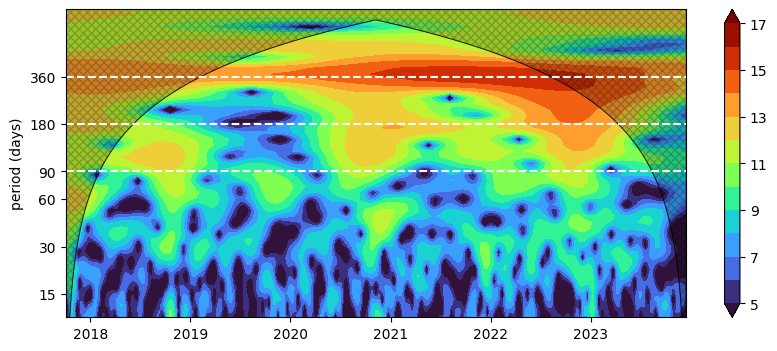

In [175]:
ss_1 = detrend(ss)

wave1, scales1, freqs1, coi1, fft1, fftfreqs1 = cwt(ss_1,dt=1,dj=dj,s0=s0, J=-1, wavelet=mother)
power1 = (np.abs(wave1)) ** 2  # Wavelet power spectrum
period1 = 1 / freqs1  # Convert frequencies to periods

period1 = 1 / freqs1  # Convert frequencies to periods
N = len(ss_1)
alpha, _, _ = wavelet.ar1(ss_1)  # Lag-1 autocorrelation for red noise
std = ss_1.std()  # Standard deviation
var = std ** 2  # Variance
signif, fft_theor = wavelet.significance(ss_1, dt, scales1, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig951 = np.ones([1, N]) * signif[:, None]
sig951 = power1 / sig951
plt.figure(figsize=(10,4))

plt.contourf(ds.TIME1, np.log2(period1), np.log2(power1), extend='both',cmap="turbo",levels=np.arange(5,18,1))
plt.plot(ds.TIME1, np.log2(coi1),color='k',linewidth=0.5)
plt.fill_between(ds.TIME1,np.log2(coi1),16,color='k',alpha=0.2,hatch='xxxx')

plt.axhline(np.log2(24*90),color='w',linestyle='--')
plt.axhline(np.log2(24*180),color='w',linestyle='--')
plt.axhline(np.log2(24*360),color='w',linestyle='--')

plt.colorbar()
plt.ylim(8,14.5)

customticks = [15*24,30*24,60*24,90*24,180*24,360*24]
customticks = [np.log2(e) for e in customticks]
customlabel = ["15","30","60","90","180","360"]
plt.yticks(customticks)
plt.gca().set_yticklabels(customlabel)
plt.ylabel("period (days)")

In [133]:

wavpow1 = xr.DataArray(
    data=power1,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1.values})
ci1 = xr.DataArray(
    data=coi1,
    dims=["time"],
    coords={'time':ds.TIME1.values})
sig1 = xr.DataArray(
    data=sig951,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1.values})
ds = xr.Dataset({
    'wavpow1': wavpow1,
    'sig1': sig1,
    'coi1': ci1,
})


In [134]:
ds.to_netcdf(patho+str(files[3]))

(1.0, 600.0)

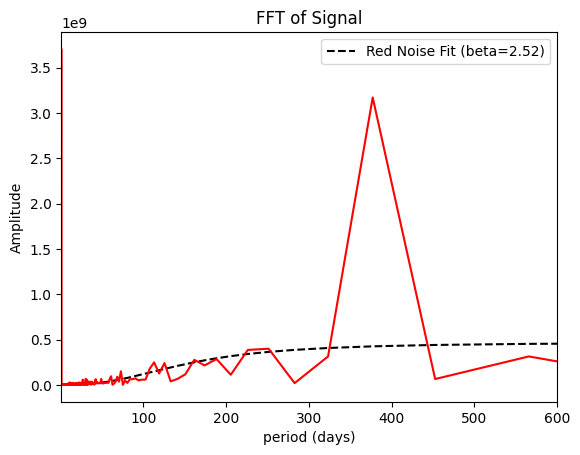

In [176]:
signal = ss_1
fft_result = np.fft.fft(signal)
power_spectrum = np.abs(fft_result) ** 2
freqs = np.fft.fftfreq(len(signal), 1)

p0 = (np.max(power_spectrum), 1.0)  # Initial guess for parameters A and beta
bounds = ([0, 0], [np.inf, np.inf])  # Lower bounds for A and beta
popt, pcov = curve_fit(red_noise_model, np.abs(freqs[:N//2]), power_spectrum[:N//2], p0=p0, bounds=bounds)
A_fit, beta_fit = popt

#plt.plot(1/freqs[1:], np.abs(fft_result[1:]),color='k')
plt.plot(1/freqs[:N//2][1:]/24, red_noise_model(np.abs(freqs[:N//2][1:]), *popt), label=f'Red Noise Fit (beta={beta_fit:.2f})', linestyle='--',color='k')

#plt.plot(1/freqs[1:], np.abs(fft_vals[1:]),color='r')
plt.plot(1/freqs[:N//2][1:]/24, power_spectrum[:N//2][1:],color='r')
#plt.plot(power_r,color='b')

plt.title('FFT of Signal')
plt.xlabel('period (days)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(1,600)
#plt.ylim(0,2*10**8)

# Udupi  

In [177]:
ds = xr.open_dataset(path+files[4])
ss = np.array(ds.SS[:,0,0].values)


In [179]:
ss_1 = detrend(ss[0:27907])
wave1, scales1, freqs1, coi1, fft1, fftfreqs1 = cwt(ss_1,dt=1,dj=dj,s0=s0, J=-1, wavelet=mother)
power1 = (np.abs(wave1)) ** 2  # Wavelet power spectrum
period1 = 1 / freqs1  # Convert frequencies to periods

N = len(ss_1)
alpha, _, _ = wavelet.ar1(ss_1)  # Lag-1 autocorrelation for red noise
std = ss_1.std()  # Standard deviation
var = std ** 2  # Variance
signif, fft_theor = wavelet.significance(ss_1, dt, scales1, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig951 = np.ones([1, N]) * signif[:, None]
sig951 = power1 / sig951


ss_2 = detrend(ss[38852:])
wave2, scales2, freqs2, coi2, fft2, fftfreqs2 = cwt(ss_2,dt=1,dj=dj,s0=s0, J=-1, wavelet=mother)
power2 = (np.abs(wave2)) ** 2  # Wavelet power spectrum
period2 = 1 / freqs2  # Convert frequencies to periods

N = len(ss_2)
alpha, _, _ = wavelet.ar1(ss_2)  # Lag-1 autocorrelation for red noise
std = ss_2.std()  # Standard deviation
var = std ** 2  # Variance
signif, fft_theor = wavelet.significance(ss_2, dt, scales2, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig952 = np.ones([1, N]) * signif[:, None]
sig952 = power2 / sig952

Text(0, 0.5, 'period (days)')

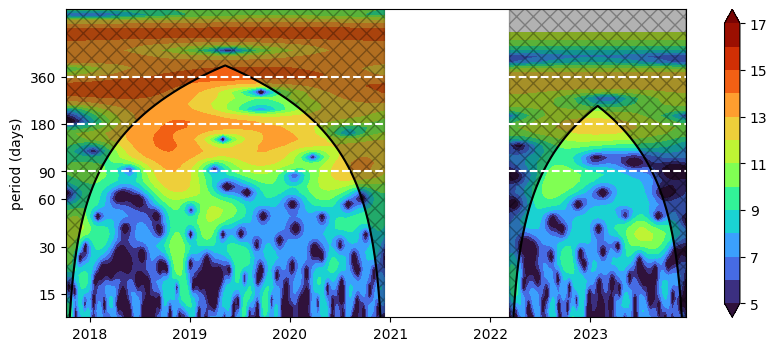

In [137]:
plt.figure(figsize=(10,4))
plt.contourf(ds.TIME1[0:27907], np.log2(period1), np.log2(power1), extend='both',cmap="turbo",levels=np.arange(5,18,1))
#plt.contourf(wave1,cmap="turbo",levels=(np.arange(20,60,10)),extend="both")
plt.plot(ds.TIME1[0:27907], np.log2(coi1),color='k')
plt.fill_between(ds.TIME1[0:27907],np.log2(coi1),16,color='k',alpha=0.3,hatch='xx')

plt.contourf(ds.TIME1[38852:], np.log2(period2), np.log2(power2), extend='both',cmap="turbo",levels=np.arange(5,18,1))
plt.plot(ds.TIME1[38852:], np.log2(coi2),color='k')
plt.fill_between(ds.TIME1[38852:],np.log2(coi2),16,color='k',alpha=0.3,hatch='xx')

plt.axhline(np.log2(24*90),color='w',linestyle='--')
plt.axhline(np.log2(24*180),color='w',linestyle='--')
plt.axhline(np.log2(24*360),color='w',linestyle='--')

plt.colorbar()
plt.ylim(8,14.5)

customticks = [15*24,30*24,60*24,90*24,180*24,360*24]
customticks = [np.log2(e) for e in customticks]
customlabel = ["15","30","60","90","180","360"]
plt.yticks(customticks)
plt.gca().set_yticklabels(customlabel)
plt.ylabel("period (days)")

In [138]:
wavpow1 = xr.DataArray(
    data=power1,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1[0:27907].values})
wavpow2=xr.DataArray(
    data=power2,
    dims=["period","time"],
    coords={"period":period2,'time':ds.TIME1[38852:].values})

ci1 = xr.DataArray(
    data=coi1,
    dims=["time"],
    coords={'time':ds.TIME1[0:27907].values})
ci2=xr.DataArray(
    data=coi2,
    dims=["time"],
    coords={'time':ds.TIME1[38852:].values}
)

sig1 = xr.DataArray(
    data=sig951,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1[0:27907].values})
sig2=xr.DataArray(
    data=sig952,
    dims=["period","time"],
    coords={"period":period2,'time':ds.TIME1[38852:].values})
ds = xr.Dataset({
    'wavpow1': wavpow1,
    'wavpow2': wavpow2,
    'sig1': sig1,
    'sig2': sig2,
    'coi1': ci1,
    'coi2': ci2,
})
ds.to_netcdf(patho+str(files[4]))

(1.0, 600.0)

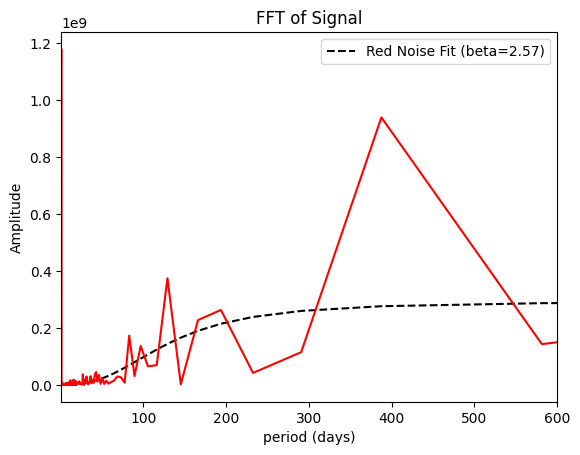

In [180]:
signal = ss_1
fft_result = np.fft.fft(signal)
power_spectrum = np.abs(fft_result) ** 2
freqs = np.fft.fftfreq(len(signal), 1)

p0 = (np.max(power_spectrum), 1.0)  # Initial guess for parameters A and beta
bounds = ([0, 0], [np.inf, np.inf])  # Lower bounds for A and beta
popt, pcov = curve_fit(red_noise_model, np.abs(freqs[:N//2]), power_spectrum[:N//2], p0=p0, bounds=bounds)
A_fit, beta_fit = popt

#plt.plot(1/freqs[1:], np.abs(fft_result[1:]),color='k')
plt.plot(1/freqs[:N//2][1:]/24, red_noise_model(np.abs(freqs[:N//2][1:]), *popt), label=f'Red Noise Fit (beta={beta_fit:.2f})', linestyle='--',color='k')

#plt.plot(1/freqs[1:], np.abs(fft_vals[1:]),color='r')
plt.plot(1/freqs[:N//2][1:]/24, power_spectrum[:N//2][1:],color='r')
#plt.plot(power_r,color='b')

plt.title('FFT of Signal')
plt.xlabel('period (days)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(1,600)
#plt.ylim(0,2*10**8)

# Kollam

In [181]:
#### different than kollam 104m timeseries

In [182]:
ds = xr.open_dataset(path+files[5])


In [183]:
ss = np.array(ds.SS[:,0,0].values)

ss_1 = detrend(ss[0:27909])

wave1, scales1, freqs1, coi1, fft1, fftfreqs1 = cwt(ss_1,dt=1,dj=dj,s0=s0, J=-1, wavelet=mother)
power1 = (np.abs(wave1)) ** 2  # Wavelet power spectrum
period1 = 1 / freqs1  # Convert frequencies to periods

N = len(ss_1)
alpha, _, _ = wavelet.ar1(ss_1)  # Lag-1 autocorrelation for red noise
std = ss_1.std()  # Standard deviation
var = std ** 2  # Variance
signif, fft_theor = wavelet.significance(ss_1, dt, scales1, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig951 = np.ones([1, N]) * signif[:, None]
sig951 = power1 / sig951


ss_2 = detrend(ss[38839:])
wave2, scales2, freqs2, coi2, fft2, fftfreqs2 = cwt(ss_2,dt=1,dj=dj,s0=s0, J=-1, wavelet=mother)
power2 = (np.abs(wave2)) ** 2  # Wavelet power spectrum
period2 = 1 / freqs2  # Convert frequencies to periods

N = len(ss_2)
alpha, _, _ = wavelet.ar1(ss_2)  # Lag-1 autocorrelation for red noise
std = ss_2.std()  # Standard deviation
var = std ** 2  # Variance
signif, fft_theor = wavelet.significance(ss_2, dt, scales2, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig952 = np.ones([1, N]) * signif[:, None]
sig952 = power2 / sig952

Text(0, 0.5, 'period (days)')

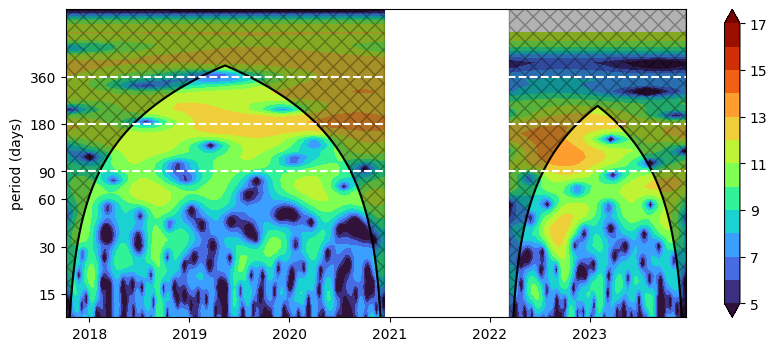

In [142]:
plt.figure(figsize=(10,4))
plt.contourf(ds.TIME1[0:27909], np.log2(period1), np.log2(power1), extend='both',cmap="turbo",levels=np.arange(5,18,1))
#plt.contourf(wave1,cmap="turbo",levels=(np.arange(20,60,10)),extend="both")
plt.plot(ds.TIME1[0:27909], np.log2(coi1),color='k')
plt.fill_between(ds.TIME1[0:27909],np.log2(coi1),16,color='k',alpha=0.3,hatch='xx')

plt.contourf(ds.TIME1[38839:], np.log2(period2), np.log2(power2), extend='both',cmap="turbo",levels=np.arange(5,18,1))
plt.plot(ds.TIME1[38839:], np.log2(coi2),color='k')
plt.fill_between(ds.TIME1[38839:],np.log2(coi2),16,color='k',alpha=0.3,hatch='xx')

plt.axhline(np.log2(24*90),color='w',linestyle='--')
plt.axhline(np.log2(24*180),color='w',linestyle='--')
plt.axhline(np.log2(24*360),color='w',linestyle='--')

plt.colorbar()
plt.ylim(8,14.5)

customticks = [15*24,30*24,60*24,90*24,180*24,360*24]
customticks = [np.log2(e) for e in customticks]
customlabel = ["15","30","60","90","180","360"]
plt.yticks(customticks)
plt.gca().set_yticklabels(customlabel)
plt.ylabel("period (days)")

In [143]:
wavpow1 = xr.DataArray(
    data=power1,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1[0:27909].values})
wavpow2=xr.DataArray(
    data=power2,
    dims=["period","time"],
    coords={"period":period2,'time':ds.TIME1[38839:].values})

ci1 = xr.DataArray(
    data=coi1,
    dims=["time"],
    coords={'time':ds.TIME1[0:27909].values})
ci2=xr.DataArray(
    data=coi2,
    dims=["time"],
    coords={'time':ds.TIME1[38839:].values}
)

sig1 = xr.DataArray(
    data=sig951,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1[0:27909].values})
sig2=xr.DataArray(
    data=sig952,
    dims=["period","time"],
    coords={"period":period2,'time':ds.TIME1[38839:].values})
ds = xr.Dataset({
    'wavpow1': wavpow1,
    'wavpow2': wavpow2,
    'sig1': sig1,
    'sig2': sig2,
    'coi1': ci1,
    'coi2': ci2,
})
ds.to_netcdf(patho+str(files[5]))

(1.0, 600.0)

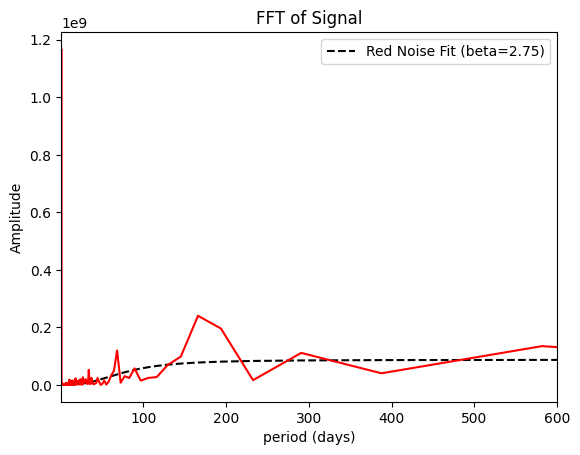

In [184]:
signal = ss_1
fft_result = np.fft.fft(signal)
power_spectrum = np.abs(fft_result) ** 2
freqs = np.fft.fftfreq(len(signal), 1)

p0 = (np.max(power_spectrum), 1.0)  # Initial guess for parameters A and beta
bounds = ([0, 0], [np.inf, np.inf])  # Lower bounds for A and beta
popt, pcov = curve_fit(red_noise_model, np.abs(freqs[:N//2]), power_spectrum[:N//2], p0=p0, bounds=bounds)
A_fit, beta_fit = popt

#plt.plot(1/freqs[1:], np.abs(fft_result[1:]),color='k')
plt.plot(1/freqs[:N//2][1:]/24, red_noise_model(np.abs(freqs[:N//2][1:]), *popt), label=f'Red Noise Fit (beta={beta_fit:.2f})', linestyle='--',color='k')

#plt.plot(1/freqs[1:], np.abs(fft_vals[1:]),color='r')
plt.plot(1/freqs[:N//2][1:]/24, power_spectrum[:N//2][1:],color='r')
#plt.plot(power_r,color='b')

plt.title('FFT of Signal')
plt.xlabel('period (days)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(1,600)
#plt.ylim(0,2*10**8)

# Kanyakumari

In [1]:
## special case: the gap between consecutive deployment was more than 3 days, not filled by graft filling, so made spline interpolation and filled


In [185]:
ds = xr.open_dataset(path+files[6])

In [186]:
ds.SS[:,0,0].shape

(45975,)

In [187]:
ds = ds.interpolate_na(dim="TIME1",method="spline")

Text(0, 0.5, 'period (days)')

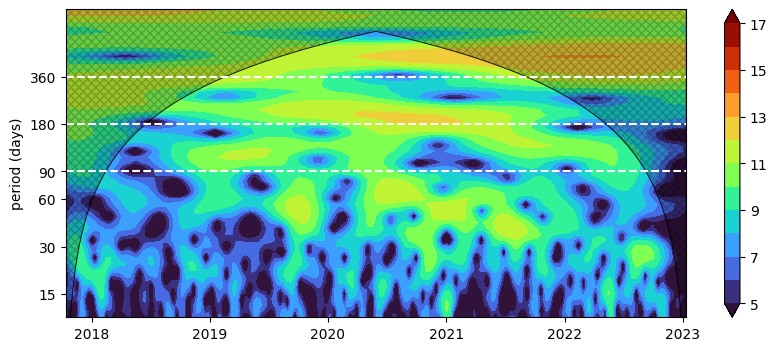

In [188]:
ss = np.array(ds.SS[:45975,0,0].values)
ss_1 = detrend(ss)

wave1, scales1, freqs1, coi1, fft1, fftfreqs1 = cwt(ss_1,dt=1,dj=dj,s0=s0, J=-1, wavelet=mother)
power1 = (np.abs(wave1)) ** 2  # Wavelet power spectrum
period1 = 1 / freqs1  # Convert frequencies to periods

period1 = 1 / freqs1  # Convert frequencies to periods
N = len(ss_1)
alpha, _, _ = wavelet.ar1(ss_1)  # Lag-1 autocorrelation for red noise
std = ss_1.std()  # Standard deviation
var = std ** 2  # Variance
signif, fft_theor = wavelet.significance(ss_1, dt, scales1, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig951 = np.ones([1, N]) * signif[:, None]
sig951 = power1 / sig951
plt.figure(figsize=(10,4))

plt.contourf(ds.TIME1[:45975], np.log2(period1), np.log2(power1), extend='both',cmap="turbo",levels=np.arange(5,18,1))
plt.plot(ds.TIME1[:45975], np.log2(coi1),color='k',linewidth=0.5)
plt.fill_between(ds.TIME1[:45975],np.log2(coi1),16,color='k',alpha=0.2,hatch='xxxx')

plt.axhline(np.log2(24*90),color='w',linestyle='--')
plt.axhline(np.log2(24*180),color='w',linestyle='--')
plt.axhline(np.log2(24*360),color='w',linestyle='--')

plt.colorbar()
plt.ylim(8,14.5)

customticks = [15*24,30*24,60*24,90*24,180*24,360*24]
customticks = [np.log2(e) for e in customticks]
customlabel = ["15","30","60","90","180","360"]
plt.yticks(customticks)
plt.gca().set_yticklabels(customlabel)
plt.ylabel("period (days)")

In [13]:

wavpow1 = xr.DataArray(
    data=power1,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1[:45975].values})
ci1 = xr.DataArray(
    data=coi1,
    dims=["time"],
    coords={'time':ds.TIME1[:45975].values})
sig1 = xr.DataArray(
    data=sig951,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1[:45975].values})
ds = xr.Dataset({
    'wavpow1': wavpow1,
    'sig1': sig1,
    'coi1': ci1,
})

ds.to_netcdf(patho+str(files[6]))

(1.0, 600.0)

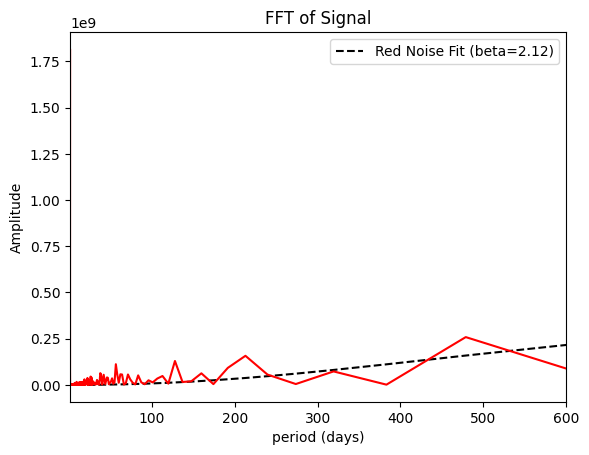

In [189]:
signal = ss_1
fft_result = np.fft.fft(signal)
power_spectrum = np.abs(fft_result) ** 2
freqs = np.fft.fftfreq(len(signal), 1)

p0 = (np.max(power_spectrum), 1.0)  # Initial guess for parameters A and beta
bounds = ([0, 0], [np.inf, np.inf])  # Lower bounds for A and beta
popt, pcov = curve_fit(red_noise_model, np.abs(freqs[:N//2]), power_spectrum[:N//2], p0=p0, bounds=bounds)
A_fit, beta_fit = popt

#plt.plot(1/freqs[1:], np.abs(fft_result[1:]),color='k')
plt.plot(1/freqs[:N//2][1:]/24, red_noise_model(np.abs(freqs[:N//2][1:]), *popt), label=f'Red Noise Fit (beta={beta_fit:.2f})', linestyle='--',color='k')

#plt.plot(1/freqs[1:], np.abs(fft_vals[1:]),color='r')
plt.plot(1/freqs[:N//2][1:]/24, power_spectrum[:N//2][1:],color='r')
#plt.plot(power_r,color='b')

plt.title('FFT of Signal')
plt.xlabel('period (days)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(1,600)
#plt.ylim(0,2*10**8)

#### for kanyakumari (excluding 2022 data)

In [166]:
ss = np.array(ds.SS[:,0,0].values)

ss_1 = detrend(ss[0:27909])

wave1, scales1, freqs1, coi1, fft1, fftfreqs1 = cwt(ss_1,dt=1,dj=dj,s0=s0, J=-1, wavelet=mother)
power1 = (np.abs(wave1)) ** 2  # Wavelet power spectrum
period1 = 1 / freqs1  # Convert frequencies to periods

N = len(ss_1)
alpha, _, _ = wavelet.ar1(ss_1)  # Lag-1 autocorrelation for red noise
std = ss_1.std()  # Standard deviation
var = std ** 2  # Variance
signif, fft_theor = wavelet.significance(ss_1, dt, scales1, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig951 = np.ones([1, N]) * signif[:, None]
sig951 = power1 / sig951


ss_2 = detrend(ss[38839:])
wave2, scales2, freqs2, coi2, fft2, fftfreqs2 = cwt(ss_2,dt=1,dj=dj,s0=s0, J=-1, wavelet=mother)
power2 = (np.abs(wave2)) ** 2  # Wavelet power spectrum
period2 = 1 / freqs2  # Convert frequencies to periods

N = len(ss_2)
alpha, _, _ = wavelet.ar1(ss_2)  # Lag-1 autocorrelation for red noise
std = ss_2.std()  # Standard deviation
var = std ** 2  # Variance
signif, fft_theor = wavelet.significance(ss_2, dt, scales2, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig952 = np.ones([1, N]) * signif[:, None]
sig952 = power2 / sig952

Text(0, 0.5, 'period (days)')

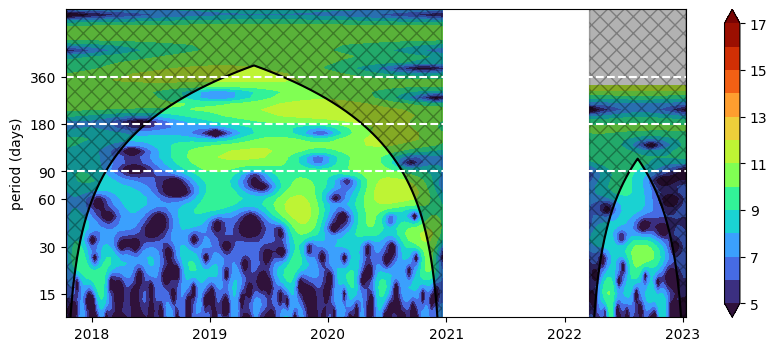

In [167]:
plt.figure(figsize=(10,4))
plt.contourf(ds.TIME1[0:27909], np.log2(period1), np.log2(power1), extend='both',cmap="turbo",levels=np.arange(5,18,1))
#plt.contourf(wave1,cmap="turbo",levels=(np.arange(20,60,10)),extend="both")
plt.plot(ds.TIME1[0:27909], np.log2(coi1),color='k')
plt.fill_between(ds.TIME1[0:27909],np.log2(coi1),16,color='k',alpha=0.3,hatch='xx')

plt.contourf(ds.TIME1[38839:], np.log2(period2), np.log2(power2), extend='both',cmap="turbo",levels=np.arange(5,18,1))
plt.plot(ds.TIME1[38839:], np.log2(coi2),color='k')
plt.fill_between(ds.TIME1[38839:],np.log2(coi2),16,color='k',alpha=0.3,hatch='xx')

plt.axhline(np.log2(24*90),color='w',linestyle='--')
plt.axhline(np.log2(24*180),color='w',linestyle='--')
plt.axhline(np.log2(24*360),color='w',linestyle='--')

plt.colorbar()
plt.ylim(8,14.5)

customticks = [15*24,30*24,60*24,90*24,180*24,360*24]
customticks = [np.log2(e) for e in customticks]
customlabel = ["15","30","60","90","180","360"]
plt.yticks(customticks)
plt.gca().set_yticklabels(customlabel)
plt.ylabel("period (days)")

In [150]:
wavpow1 = xr.DataArray(
    data=power1,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1[0:27909].values})
wavpow2=xr.DataArray(
    data=power2,
    dims=["period","time"],
    coords={"period":period2,'time':ds.TIME1[38839:].values})

ci1 = xr.DataArray(
    data=coi1,
    dims=["time"],
    coords={'time':ds.TIME1[0:27909].values})
ci2=xr.DataArray(
    data=coi2,
    dims=["time"],
    coords={'time':ds.TIME1[38839:].values}
)

sig1 = xr.DataArray(
    data=sig951,
    dims=["period","time"],
    coords={"period":period1,'time':ds.TIME1[0:27909].values})
sig2=xr.DataArray(
    data=sig952,
    dims=["period","time"],
    coords={"period":period2,'time':ds.TIME1[38839:].values})
ds = xr.Dataset({
    'wavpow1': wavpow1,
    'wavpow2': wavpow2,
    'sig1': sig1,
    'sig2': sig2,
    'coi1': ci1,
    'coi2': ci2,
})
ds.to_netcdf(patho+str(files[6]))

# OKHA data recreated

In [29]:
ds = xr.open_dataset(patho+"1okha_graftfill.nc")

Text(0, 0.5, 'period (days)')

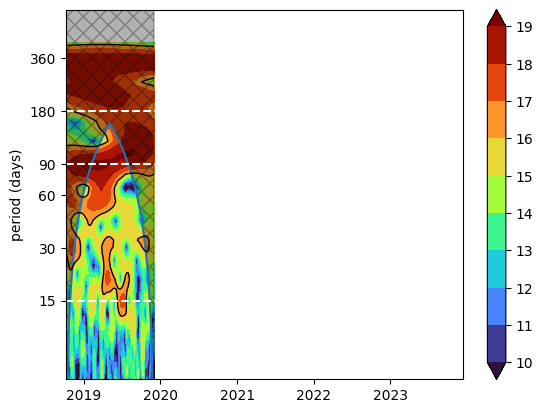

In [49]:
x = plt.contourf(ds.time,np.log2(ds.period),np.log2(ds.wavpow1),extend='both',cmap="turbo",levels=np.arange(10,20,1))
plt.plot(ds.time, np.log2(ds.coi1))
plt.fill_between(ds.time, np.log2(ds.coi1),16,color='k',alpha=0.3,hatch='xx')

extent = [ds.time.min(), ds.time.max(), 0, max(ds.period)]
plt.contour(ds.time, np.log2(ds.period), ds.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)
plt.ylim(7,13)

plt.axhline(np.log2(24),color='w',linestyle='--')
plt.axhline(np.log2(24*15),color='w',linestyle='--')
plt.axhline(np.log2(24*90),color='w',linestyle='--')
plt.axhline(np.log2(24*180),color='w',linestyle='--')


plt.colorbar(x)

plt.ylim(7,14)
customticks = [15*24,30*24,60*24,90*24,180*24,360*24]
customticks = [np.log2(e) for e in customticks]
customlabel = ["15","30","60","90","180","360"]
plt.yticks(customticks)
plt.gca().set_yticklabels(customlabel)
plt.ylabel("period (days)")